# Loading, preparing, and plotting data: a basic example

This notebook means to provide the minimal steps to:
1.   load a dataset like the one provided by Our World in Data
2.   prepare the data to be plotted
3.   plot the data
4.   save the plot

### Loading the data

Our World in Data provides a very complete dataset for COVID-19 related data. It is located at

In [92]:
# defines the location from where to retrieve the data
dataOnlineAddress = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

It is a large file, and you may not want to download it again and again if you know the dataset has not been updated (the online dataset is updated daily, so in principle it is enough to download it once per day. One can get even more sophisticated, but maybe not needed in this short example.

Anyway, these few lines of code give the flexibility to load the data from the remote repository or from a local copy.

In [93]:
# sets the location from where to read the data depending of whether we choose to read it online or from a local copy

# variable to switch between local and remote
fromLocal = False # set to True to load a local copy

#provide the location of the data on your machine; only needed if reading the data locally
#set the value as needed; there might be issues related to the use of "\" in the address,
# which may be interpreted as some string encoding, in which case you may want to prepend
# the standard address string with an r, as in, e.g. r"C:\myfolder\test.csv"
dataLocalAddress = ""

# based on the choice of local or remote data retrieval, set the data location
if fromLocal:
    dataLocation = dataLocalAddress
else:
    dataLocation = dataOnlineAddress

OK, we know where the data are. How are we going to get it? Well, in Pythonland, the most straightforward way to do that also helps us get ready for the next steps is probably that of using *Pandas* (see how to install it here https://pandas.pydata.org/getting_started.html)

In [94]:
# We are importing pandas in our program, with the standard alias pd
import pandas as pd

Pandas allow us to download the data and at the same time use it to populate a *dataframe*, which is essentially a fancy table that can later be manipulated. We download and generate the dataframe that hosts the data with just one line

In [95]:
#downloads the data and uses it to populate the dataframe df
df = pd.read_csv(dataLocation)

We can inspect the dataframe we have loaded via, e.g.

In [96]:
#displays the top rows of the dataframe
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Pandas has done a lot of work for us, by loading the data into the dataframe, and automatically creating/assigning:
-   an index (the leftmost column with no title)
-   names to the columns (aka known as fields)
-   interpreting the values in the file, including recognizing the date field and assinging NaN (for "Not a Number") to some (inexistent) entries

Worth stressing that, while Pandas does wonders, it could easily do the above only because *the dataset file is a well curated dataset file*.

Each column corresponds to a so-called field, or property. For example "location" indicates, well, the location.

Each row is a data entry, which in the case of this dataset reports the values of the fields at a given location and at a given date.

A detailed description of the fields is available at https://github.com/owid/covid-19-data/tree/master/public/data

We can quickly explore which fields are available by simply listing the columns of the dataset

In [97]:
#shows the columns / fields of the dataset. Technically, it is not a "simple" list, but an index of the fields available
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Preparing the data to be plotted

We can select of subset of fields by "slicing" with a use of a list of fields

In [98]:
# shows a subset of the the dataframe, which is a dataframe with less columns
selectedFields = ["location","date","new_cases_smoothed"]
df[selectedFields]

,location,date,new_cases_smoothed
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
183843,Zimbabwe,2022-04-30,50.143
183844,Zimbabwe,2022-05-01,55.286
183845,Zimbabwe,2022-05-02,48.143
183846,Zimbabwe,2022-05-03,46.143


We can access the values of a specific columns in this way

In [99]:
#select a column
df["location"]

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
183843       Zimbabwe
183844       Zimbabwe
183845       Zimbabwe
183846       Zimbabwe
183847       Zimbabwe
Name: location, Length: 183848, dtype: object

Note that what we have obtained in this last step is not a dataframe but a series. Note that "location" is not listed at the top, and instead appears as Name.

In [100]:
type(df["location"])

pandas.core.series.Series

If instead we had sliced with a list containing the same element, we would have obtained a dataframe with just one columnn (besides the index)

In [101]:
# select part of the dataframe corresponding to just one column
selectedFields = ["location"]
df[selectedFields]

,location
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
183843,Zimbabwe
183844,Zimbabwe
183845,Zimbabwe
183846,Zimbabwe


In [102]:
type(df[selectedFields])

pandas.core.frame.DataFrame

### **BELOW STILL TO BE COMMENTED**

In [109]:
fixedFields = ["location","date"]
selectedField = "new_deaths_smoothed"
df_data_to_plot = df[fixedFields+ [selectedField]]

In [110]:
myLocation = "United States"
df_to_plot = df_data_to_plot[df_data_to_plot.location == myLocation]
df_to_plot

,location,date,new_deaths_smoothed
173195,United States,2020-01-22,NaN
173196,United States,2020-01-23,NaN
173197,United States,2020-01-24,NaN
173198,United States,2020-01-25,NaN
173199,United States,2020-01-26,NaN
...,...,...,...
174024,United States,2022-04-30,333.571
174025,United States,2022-05-01,334.143
174026,United States,2022-05-02,331.714
174027,United States,2022-05-03,390.857


In [111]:
df_to_plot = df_to_plot.set_index("date")
df_to_plot

,location,new_deaths_smoothed
date,,
2020-01-22,United States,NaN
2020-01-23,United States,NaN
2020-01-24,United States,NaN
2020-01-25,United States,NaN
2020-01-26,United States,NaN
...,...,...
2022-04-30,United States,333.571
2022-05-01,United States,334.143
2022-05-02,United States,331.714


In [112]:
df_to_plot[selectedField]

date
2020-01-22        NaN
2020-01-23        NaN
2020-01-24        NaN
2020-01-25        NaN
2020-01-26        NaN
               ...   
2022-04-30    333.571
2022-05-01    334.143
2022-05-02    331.714
2022-05-03    390.857
2022-05-04    556.571
Name: new_deaths_smoothed, Length: 834, dtype: float64

### Plotting

(0.0, 3559.114)

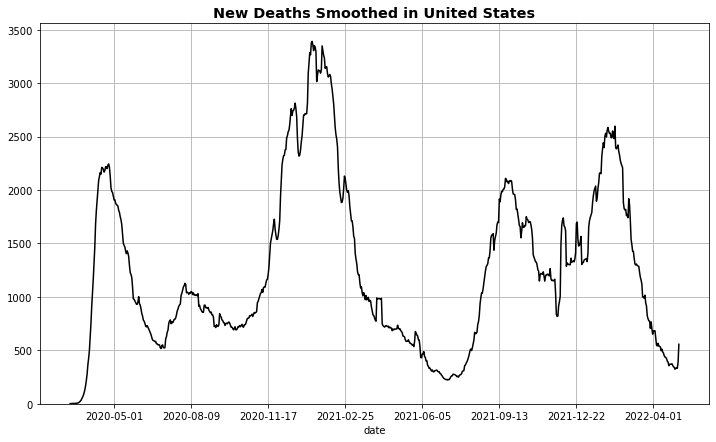

In [113]:
ax = df_to_plot[selectedField].plot(
        legend = False,
        title = " ".join([myString.capitalize() for myString in selectedField.split("_")]) + " in " + myLocation,
        figsize = (12,7),
        grid = True,
        c = "black"
)
ax.title.set_size("x-large")
ax.title.set_fontweight("bold")
myYlimits = ax.get_ylim()
ax.set_ylim(0,myYlimits[1])